In [9]:
import pybinding as pb
%matplotlib inline 
import pybinding as pb
from math import sqrt
from math import sqrt, pi, atan
import matplotlib.pyplot as plt
from math import cos,tan
from sympy import * 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy import interpolate
from matplotlib.animation import FuncAnimation, PillowWriter  

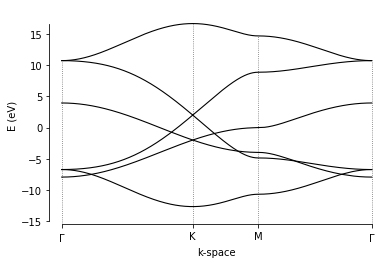

In [6]:
def Sb(Vpi=-0.33*2,Vsig=1.3*2,u=0,theta_1=0,plot=0,d=0,strain=1,minim=0,ax=None):
    from sympy import sqrt 
    a = Symbol('a',positive=True)
    vp = Symbol('V_{\pi}',real=True)
    vs = Symbol('V_{\sigma}',real=True)
    h=Symbol('h')
    theta=atan(h/a)
    d1=(a/2)*Matrix([-sqrt(3),1,2*tan(theta)])
    d2=(a/2)*Matrix([sqrt(3),1,2*tan(theta)])
    d3=(a)*Matrix([0,-1,tan(theta)])
    ex=Matrix([1,0,0])
    ey=Matrix([0,1,0])
    ez=Matrix([0,0,1])

    l1=(d1/sqrt(d1.dot(d1)))[0].simplify()
    m1=(d1/sqrt(d1.dot(d1)))[1].simplify()
    n1=(d1/sqrt(d1.dot(d1)))[2].simplify()

    l2=(d2/sqrt(d2.dot(d2)))[0].simplify()
    m2=(d2/sqrt(d2.dot(d2)))[1].simplify()
    n2=(d2/sqrt(d2.dot(d2)))[2].simplify()

    l3=(d3/sqrt(d3.dot(d3)))[0].simplify()
    m3=(d3/sqrt(d3.dot(d3)))[1].simplify()
    n3=(d3/sqrt(d3.dot(d3)))[2].simplify()

    e1xx=l1**2 *vs +(1-l1**2)*vp
    e1yy=m1**2 *vs +(1-m1**2)*vp
    e1zz=n1**2 *vs +(1-n1**2)*vp
    e1xz=l1*n1*(vs-vp)
    e1yz=m1*n1*(vs-vp)
    e1xy=l1*m1*(vs-vp)


    e2xx=l2**2 *vs +(1-l2**2)*vp
    e2yy=m2**2 *vs +(1-m2**2)*vp
    e2zz=n2**2 *vs +(1-n2**2)*vp
    e2xz=l2*n2*(vs-vp)
    e2yz=m2*n2*(vs-vp)
    e2xy=l2*m2*(vs-vp)


    e3xx=l3**2 *vs +(1-l3**2)*vp
    e3yy=m3**2 *vs +(1-m3**2)*vp
    e3zz=n3**2 *vs +(1-n3**2)*vp
    e3xz=l3*n3*(vs-vp)
    e3yz=m3*n3*(vs-vp)
    e3xy=l3*m3*(vs-vp)


    t1_1=Matrix([[e1xx,e1xy,e1xz],
    [e1xy,e1yy,e1yz],
    [e1xz,e1yz,e1zz]])
    t2_1=Matrix([[e2xx,e2xy,e2xz],
    [e2xy,e2yy,e2yz],
    [e2xz,e2yz,e2zz]])
    t3_1=Matrix([[e3xx,e3xy,e3xz],
    [e3xy,e3yy,e3yz],
    [e3xz,e3yz,e3zz]])
    b=1
    theta=theta_1
    a1=b*np.cos(np.deg2rad(theta))
    h1=b*np.sin(np.deg2rad(theta))

    t1=matrix2numpy(t1_1.subs({vp:Vpi,vs:Vsig,h:h1,a:a1}))
    t2=matrix2numpy(t2_1.subs({vp:Vpi,vs:Vsig,h:h1,a:a1}))*strain
    t3=matrix2numpy(t3_1.subs({vp:Vpi,vs:Vsig,h:h1,a:a1}))
    
    def monolayer_sb(a,h,u=0,d=0):
        a_cc = a 
        #t = -1.8      
        
        lat = pb.Lattice(a1=[a*sqrt(3)/2, a*1/2],
                         a2=[a*sqrt(3)/2, a*-1/2])
        lat.add_sublattices(('Ax', [0, 0,0],d-u),
                            ('Ay', [0, 0,0],d-u),
                            ('Az', [0, 0,0],-d-u),
                            ('Bx', [a*2/3.,0,h],d+u),
                           ('By', [a*2/3., 0,h],d+u),
                           ('Bz', [a*2/3., 0,h],-d+u),)
        lat.add_hoppings(
            # inside the main cell
            ([0,  0], 'Ax', 'Bx', t1[0][0]),
            ([0,  0], 'Ax', 'By', t1[0][1]),
            ([0,  0], 'Ax', 'Bz', t1[0][2]),
            ([0,  0], 'Ay', 'Bx', t1[1][0]),
            ([0,  0], 'Ay', 'By', t1[1][1]),
            ([0,  0], 'Ay', 'Bz', t1[1][2]),
            ([0,  0], 'Az', 'Bx', t1[2][0]),
            ([0,  0], 'Az', 'By', t1[2][1]),
            ([0,  0], 'Az', 'Bz', t1[2][2]),

            # between neighboring cells
            ([-1,0], 'Ax', 'Bx', t2[0][0]),
            ([-1,0], 'Ax', 'By', t2[0][1]),
            ([-1,0], 'Ax', 'Bz', t2[0][2]),
            ([-1,0], 'Ay', 'Bx', t2[1][0]),
            ([-1,0], 'Ay', 'By', t2[1][1]),
            ([-1,0], 'Ay', 'Bz', t2[1][2]),
            ([-1,0], 'Az', 'Bx', t2[2][0]),
            ([-1,0], 'Az', 'By', t2[2][1]),
            ([-1,0], 'Az', 'Bz', t2[2][2]),


            ([0, -1], 'Ax', 'Bx', t3[0][0]),
            ([0, -1], 'Ax', 'By', t3[0][1]),
            ([0, -1], 'Ax', 'Bz', t3[0][2]),
            ([0, -1], 'Ay', 'Bx', t3[1][0]),
            ([0, -1], 'Ay', 'By', t3[1][1]),
            ([0, -1], 'Ay', 'Bz', t3[1][2]),
            ([0, -1], 'Az', 'Bx', t3[2][0]),
            ([0, -1], 'Az', 'By', t3[2][1]),
            ([0, -1], 'Az', 'Bz', t3[2][2])
        )
        if minim:
            lat.min_neighbors = 2
        return lat
    #fig, ax = plt.subplots(nrows=1, ncols=3)
#     lattice = monolayer_sb(a1,h1,u,d)
#     lattice.plot("yx")
#     plt.show()
#    lattice.plot("yz")
#    plt.show()
#    lattice.plot_brillouin_zone()
#    plt.show()
    from math import sqrt, pi
    if plot!=0:
        model = pb.Model(monolayer_sb(a1,h1,u,d), pb.translational_symmetry())
        solver = pb.solver.lapack(model)

        a_cc = a1
        Gamma = [0, 0]
        m=(1/a1)
        s=(1/a1)*(sqrt(3)*2*pi/3)
        #M=[m*2/sqrt(3)*np.sin(pi/6),m*2/sqrt(3)*np.cos(pi/6)]
        M=[s*np.sin(pi/6),s*np.cos(pi/6)]
        K1=[0,4*pi/(3*a1)]
        bands = solver.calc_bands( Gamma,K1, M, Gamma, step=0.01)
        bands.plot(point_labels=[ r'$\Gamma$', 'K','M',r'$\Gamma$' ],**{"color":"k"})
        kwargs={'alpha':0.5}
        if plot==2:
            plt.sca(ax)
        if plot==1:
            plt.show()
#         monolayer_sb(a1,h1,u,d).plot_brillouin_zone()
#         plt.show()
    return monolayer_sb(a1,h1,u)
lat=Sb(Vpi=-0.33*6,Vsig=1.3*6,u=0,theta_1=0,plot=1,d=2)

In [7]:
def rectangle(width, height):
    x0 = width / 2
    y0 = height / 2
    return pb.Polygon([[x0, y0], [x0, -y0], [-x0, -y0], [-x0, y0]])
orientation=pi/2
theta=30
a1=np.cos(np.deg2rad(theta))
lat=Sb(Vpi=-0.33*2,Vsig=1.3*2,u=0.0,theta_1=theta)
model = pb.Model(
    lat.with_offset([a1/2,0]),pb.regular_polygon(num_sides=6, radius=a1*13, angle=orientation)
)
solver =  pb.solver.lapack(model)#pb.solver.arpack(model, k=90)
eig=solver.eigenvalues

In [240]:
def init(ax):
    n=0
    probability_map = solver.calc_probability(np.arange(0,n))
    plt.sca(ax[0])
    z=probability_map.data
    x=probability_map.x
    y=probability_map.y
    ny= nx = 200
    # Generate a regular grid to interpolate the data.
    xi = np.linspace(x.min(), x.max(), nx)
    yi = np.linspace(y.min(), y.max(), ny)
    xi, yi = np.meshgrid(xi, yi)
    zi = interpolate.griddata((x,y),z,(xi,yi))

    # ax[0].pcolormesh(xi,yi,zi,cmap="hot",alpha=0.2)#,vmin=.49)
    probability_map.plot(site_radius=(0.07, 0.82),cmap="Greys")
    model.plot(site={'radius': 0.1, 'cmap': ['blue','blue','blue','red','red','red']})#,**{"ax":ax[0]})

    segs = np.zeros((len(eig), 2, 2))
    segs[:,:,1] = np.c_[eig,eig]
    segs[:,1,0] = np.ones(len(eig))
    lc = LineCollection(segs,color='k',lw=.2)#, transform=ax[1].get_yaxis_transform())
    ax[1].add_collection(lc)
    # ax[1].axhline(0,c="blue",ls="-",lw=1)
    ax[1].set_ylim(-4,4)
    ax[1].set_xlim(-1,2)
    ax[1].set_xticklabels("")
    ax[1].set_ylabel("Energy")
    ax[1].axhline(eig[n],c="red",ls="-",lw=2)
def update(n,ax):
    for i in ax:i.clear()
    probability_map = solver.calc_probability(np.arange(0,n))
    ax[1].set_title("$\sum_{i=1}^n\Psi_i(x)$")
#     plt.sca(ax[0])
    z=probability_map.data
    x=probability_map.x
    y=probability_map.y
    ny= nx = 200
    # Generate a regular grid to interpolate the data.
    xi = np.linspace(x.min(), x.max(), nx)
    yi = np.linspace(y.min(), y.max(), ny)
    xi, yi = np.meshgrid(xi, yi)
    zi = interpolate.griddata((x,y),z,(xi,yi))
    if n==1523:
        xmin=0.07;xmax=0.82
    else:
        xmin=0.07;xmax=0.32
    probability_map.plot(site_radius=(xmin, xmax),cmap="Greys")
    model.plot(site={'radius': 0.1, 'cmap': ['blue','blue','blue','red','red','red']})#,**{"ax":ax[0]})
    segs = np.zeros((len(eig), 2, 2))
    segs[:,:,1] = np.c_[eig,eig]
    segs[:,1,0] = np.ones(len(eig))
    lc = LineCollection(segs,color='k',lw=.2)
    ax[0].add_collection(lc)
    # ax[1].axhline(0,c="blue",ls="-",lw=1)
    ax[0].set_ylim(-4,4)
    ax[0].set_xlim(-1,2)
    ax[0].set_xticklabels("")
    ax[0].set_ylabel("Energy")
    ax[0].axhline(eig[n],c="red",ls="-",lw=2)
     
    

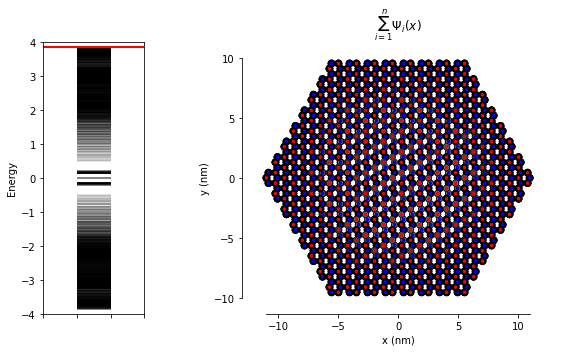

In [241]:
# def init():
#     global ax
#     ax[0].plot(np.random.random(10))
# def update(n,ax):
#     plt.plot(np.random.random(n))
fig,ax1=plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios': [1, 4]})

n=30
a=np.linspace(0,len(eig)-1,n)[np.argmax(np.linspace(0,len(eig)-1,n)>1523)]
vals=np.sort([int(i) for i in np.linspace(0,len(eig)-1,n)]+[1523]+[int(a)]*3)
ani = FuncAnimation(fig, update, vals,fargs=[ax1])  
writer = PillowWriter(fps=3)  
ani.save("wav_afm.gif", writer=writer, dpi=300)  

In [242]:
from pygifsicle import optimize

optimize("wav_afm.gif", "optimized.gif") 